In [1]:
import os
import numpy as np
#from random import randint
import random
import cv2

In [448]:
location = os.getcwd() # get present working directory location here
counter = 0 #keep a count of all files found

location = location+ "/Furniture"
bed = location + "/bed_jpg"
print(bed)
len(bed)
names = os.listdir(bed)


p = cv2.imread(os.path.join(bed,names[0]))
p[0][0]


chair = location + "/chair_jpg"
lamp = location + "/lamp_jpg"
shelf = location + "/shelf_jpg"
sofa = location + "/sofa_jpg"
stool = location + "/stool_jpg"
table = location + "/table_jpg"
wardrobe = location + "/wardrobe_jpg"

/Users/amreenshaikh/Documents/NNFL/lab3/Furniture/bed_jpg


In [641]:
def load_images_from_folder(folder,x,y):
    images = []
    if(x==236):
        x1 = 62
    if(x==360):
        x1=0
    if(y==180):
        y1=40
    if(y==260):
        y1=0
    m=1
    if(folder==bed):
        m = 0
    if(folder==chair):
        m = 1
    if(folder==lamp):
        m = 2
    if(folder==shelf):
        m = 3
    if(folder==sofa):
        m = 4
    if(folder==stool):
        m = 5
    if(folder==table):
        m = 6
    if(folder==wardrobe):
        m = 7
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        constant= cv2.copyMakeBorder(img,y1,y1,x1,x1,cv2.BORDER_CONSTANT,value=[255,255,255])
        #res = cv.resize(constant,(32,32), interpolation = cv.INTER_CUBIC)
        res = cv2.resize(img, (96, 96))
        res = res/255
        res=np.asarray(res)
        if res is not None:
            images.append([res,m])
    return images

In [642]:
#x_data = []
#y_data = []

In [643]:
#print(len(x_data))
bed1= (load_images_from_folder(bed,360,180))
#print(bed1[0][0][12][21])
#print(len(bed1[0]))


In [644]:
print(type(bed1[0][0].shape))

<class 'tuple'>


In [645]:



#bed1 = (load_images_from_folder(bed))
lamp1  = load_images_from_folder(chair,236,260)
chair1 = load_images_from_folder(lamp,236,260)
shelf1 = load_images_from_folder(shelf,236,260)
sofa1  = load_images_from_folder(sofa,360,180)
stool1 = load_images_from_folder(stool,236,260)
table1 = load_images_from_folder(table,236,260)
wardrobe1 = load_images_from_folder(wardrobe,236,260)

In [646]:
print(len(bed1))
print(len(chair1))
print(len(lamp1))
print(len(shelf1))
print(len(sofa1))
print(len(stool1))
print(len(table1))
print(len(wardrobe1))

z=(len(bed1))
z=z+(len(chair1))
z=z+(len(lamp1))
z=z+(len(shelf1))
z=z+(len(sofa1))
z=z+(len(stool1))
z=z+(len(table1))
z=z+(len(wardrobe1))
print(z)
print(type(bed1))
x_data = (bed1)
print(type(x_data))

592
412
671
202
675
363
613
304
3832
<class 'list'>
<class 'list'>


In [647]:
x_data = x_data + (chair1)
x_data = x_data + (lamp1)
x_data = x_data + (shelf1)
x_data = x_data + (sofa1)
x_data = x_data + (stool1)
x_data = x_data + (table1)
x_data = x_data + (wardrobe1)


In [648]:
print(len(x_data))

3832


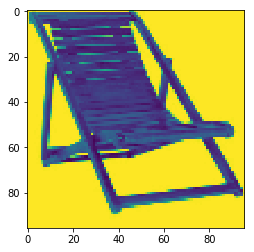

/


In [649]:
from matplotlib import pyplot as plt
plt.imshow(lamp1[0][0])
plt.show()
print(lamp[0][0])

In [675]:
from random import shuffle
shuffle(x_data)
print(len(x_data))
print(x_data[0][1])
shuffle(x_data)
print(x_data[0][1])

3832
4
4


In [676]:
x_train,x_test = x_data[:3782],x_data[3782:]

In [652]:
print(len(x_train))
print(len(x_test))
print(x_test[0][0].shape)

3782
50
(96, 96)


In [653]:
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation,Input,BatchNormalization,Conv1D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32,(2,2),input_shape=(96,96,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))

In [655]:
#print(model.summary())
#print(model1.summary())

In [656]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [658]:
import numpy as np
#myarray = np.asarray(x_train)
#print(myarray.shape)


In [677]:
from keras.utils import np_utils

train_x=[]
train_y=[]
print(x_train[3][0])
print(x_train[5][1])

for i in range(3782):
    train_x.append(x_train[i][0])
    train_y.append(x_train[i][1])
train_y_onehot = np_utils.to_categorical(train_y,8)

tx=np.asarray(train_x)
ty=np.asarray(train_y_onehot)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
5


In [678]:
print(tx.shape)
tx=np.expand_dims(tx,axis=3)
print(tx.shape)

(3782, 96, 96)
(3782, 96, 96, 1)


In [661]:
print(train_x[0])
print(train_y_onehot[0])
print(train_x[0].shape)

[[0.07843137 0.07843137 0.09019608 ... 0.10588235 0.09411765 0.09019608]
 [0.08235294 0.08627451 0.09019608 ... 0.10196078 0.10588235 0.10588235]
 [0.09019608 0.08627451 0.09019608 ... 0.10588235 0.10196078 0.10980392]
 ...
 [0.33333333 0.37647059 0.34117647 ... 0.65098039 0.65098039 0.63921569]
 [0.24313725 0.25490196 0.23921569 ... 0.57254902 0.56862745 0.52941176]
 [0.23921569 0.23921569 0.27843137 ... 0.63529412 0.61568627 0.59215686]]
[0. 0. 1. 0. 0. 0. 0. 0.]
(96, 96)


In [ ]:
model.fit(tx,ty,epochs=20,validation_split=0.2,batch_size=128)

In [351]:
model.save("modelgrey.h5")

In [684]:
'''
modela overfit  96 3 50% 96%
modelb overfit  96 3 44% 85%
model overfit   32 3 48% 98%
model64 ------  64 1 90% 51%
model64_1 ----- 64 1 92% 59%
modelgrey ----- 96 1 94% 63%
'''

'\nmodela overfit  96 3 50% 96%\nmodelb overfit  96 3 44% 85%\nmodel overfit   32 3 48% 98%\nmodel64 ------  64 1 90% 51%\nmodel64_1 ----- 64 1 92% 59%\nmodelgrey ----- 96 1 94% 63%\n'

In [685]:
from keras.models import load_model
model_test= load_model('2015A7PS0035G.h5')
#img = Image.open("data/predict/T160305M-0222c_5.jpg")

      
test_x=[]
test_y=[]

for i in range(len(x_test)):
    test_x.append(x_test[i][0])
    test_y.append(x_test[i][1])
test_y_onehot = np_utils.to_categorical(test_y,8)

testx=np.asarray(test_x)
testy=np.asarray(test_y_onehot)
testx=np.expand_dims(testx,axis=3)




In [680]:
print(testx.shape)

(50, 96, 96, 1)


In [681]:
predicted = model_test.predict(testx, batch_size=None, verbose=0, steps=None)
print(type(predicted))
print(predicted.shape)

<class 'numpy.ndarray'>
(50, 8)


In [682]:
print(testx.shape)

(50, 96, 96, 1)


In [689]:
output=[]
original=[]
for i in range(50):
    output.append(np.argmax(predicted[i]))
    original.append(np.argmax(testy[i]))    
        
print(output)
print(original)

count=0
for i in range(len(output)):
    if(output[i]==original[i]):
        count=count+1
        
print(count*100/50)

[1, 3, 0, 1, 1, 1, 4, 4, 3, 3, 4, 6, 1, 4, 7, 0, 1, 4, 6, 1, 7, 2, 1, 0, 5, 6, 6, 6, 2, 1, 4, 1, 1, 5, 0, 6, 5, 1, 4, 3, 3, 6, 5, 7, 4, 6, 4, 4, 1, 0]
[1, 3, 0, 1, 1, 1, 4, 4, 3, 3, 5, 6, 1, 4, 7, 0, 1, 4, 6, 1, 7, 2, 1, 0, 5, 6, 6, 6, 2, 1, 4, 1, 1, 5, 0, 6, 6, 1, 4, 3, 3, 6, 5, 7, 4, 6, 4, 4, 1, 0]
96.0


In [688]:
'''
here accuracy on unknown test data of 50 images is 96%
'''

'\nhere accuracy on unknown test data of 50 images is 96%\n'